# Tutorial Replication

The purpose of this notebook is simply to replicate Matt's tutorial, which can be found [on Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Sessions/List.aspx#folderID=%2265406b5e-52ef-428d-94d9-af6601597a08%22) in [two](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=c057cf3a-b1bd-4f85-a0e2-af66015ed850) [parts](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=b2e63522-720c-48e4-956a-af6901740c79); they are also [on YouTube](https://www.youtube.com/playlist?list=PLO8D5yasziTYvXqWUoiphrb0r2Ere54FS). The code used in these videos can be found in the `example_scripts` directory in this repository. This will help us get an idea of how the syntax differs between pure ROOT and the Jupyter kernel implementation.

## Library Imports

In [1]:
import uproot, glob, math, warnings
import numpy as np
import pandas as pd
import datetime as dt
import lmfit as lf
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
#%matplotlib inline

## Import Data
We also print the length of the first tree and its keys to ensure that data imported correctly.

(161790, 301)
['DetType', 'Empty', 'PAINTall', 'PAOFamps', 'PAOFamps0', 'PAOFchisq', 'PAOFchisqLF', 'PAOFdelay', 'PATFPamp', 'PATFPchisq', 'PATFPeflag', 'PATFPint', 'PATFPoffset', 'PATFPtau', 'PAWKf20', 'PAWKf40', 'PAWKf80', 'PAWKf90', 'PAWKf95', 'PAWKmax', 'PAWKr10', 'PAWKr100', 'PAWKr20', 'PAWKr30', 'PAWKr40', 'PAWKr50', 'PAWKr60', 'PAWKr70', 'PAWKr80', 'PAWKr90', 'PAWKr95', 'PAbias', 'PAbs', 'PAbspost', 'PAgain', 'PAnorm', 'PAsat', 'PAstd', 'PBINTall', 'PBOFamps', 'PBOFamps0', 'PBOFchisq', 'PBOFchisqLF', 'PBOFdelay', 'PBTFPamp', 'PBTFPchisq', 'PBTFPeflag', 'PBTFPint', 'PBTFPoffset', 'PBTFPtau', 'PBWKf20', 'PBWKf40', 'PBWKf80', 'PBWKf90', 'PBWKf95', 'PBWKmax', 'PBWKr10', 'PBWKr100', 'PBWKr20', 'PBWKr30', 'PBWKr40', 'PBWKr50', 'PBWKr60', 'PBWKr70', 'PBWKr80', 'PBWKr90', 'PBWKr95', 'PBbias', 'PBbs', 'PBbspost', 'PBgain', 'PBnorm', 'PBsat', 'PBstd', 'PCINTall', 'PCOFamps', 'PCOFamps0', 'PCOFchisq', 'PCOFchisqLF', 'PCOFdelay', 'PCTFPamp', 'PCTFPchisq', 'PCTFPeflag', 'PCTFPint', 'PCTFPoff

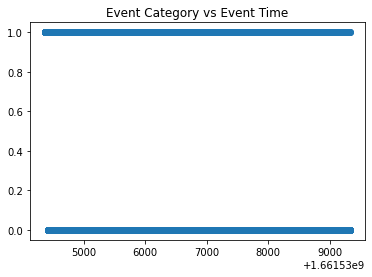

In [2]:
datapath ="/data/chocula/fritts/data/k100proc/midasrq/byseries/"
ser = ["07220822_1828","07220826_1219","07220826_1536","07220826_2007","07220827_1153","07220830_1724"]
lab = ["0V","-4V","-21V","-65V","-84V","-84V"]

#Loading all branches raises warnings, but we need to in order to see what's available
warnings.simplefilter(action="ignore",category=pd.errors.PerformanceWarning)

#As a Chain is a collection of Trees, 
#I am approximating the chain as a list of Trees.
nser = 6; e = []; z = [];
for s in ser: # For each data series,
    e_chain = pd.DataFrame(); z_chain = pd.DataFrame(); listframes = [[],[]] 
    estuff = uproot.iterate(datapath+s+"/umn*root:rqDir/eventTree",library="pd") # Collect its eventTree in estuff,
    zstuff = uproot.iterate(datapath+s+"/umn*root:rqDir/zip1",library="pd") # And its zip1 in zstuff.
    for ething,zthing in zip(estuff,zstuff): # Put the data from estuff and zstuff and put it into one list 
        listframes[0].append(ething); listframes[1].append(zthing) 
    e_chain = pd.concat(listframes[0]);z_chain = pd.concat(listframes[1]) # Put the data back into a dataframe
    e.append(e_chain); z.append(z_chain) # Now e and z are lists of dataframes
    
#friends are complicated. here's the docs page on tchain friends: 
#https://root.cern/doc/master/classTChain.html#a967c9e4e14e314b46e4c11bc6a1c2353
#I think this is a reasonable approximation of them
for i,x in enumerate(z): # Put the data from e into z
    z[i] = pd.concat([x,e[i]],axis=1)

print(z[0].shape)
print(list(z[0]))

plt.scatter(z[1]['EventTime'],z[1]['EventCategory'])
plt.title("Event Category vs Event Time")
plt.show()

Events have two categories; random (1) or triggered (0). Random events are taken so that we can perform diagnostics, but they aren't of any physical interest. 
Here, we are plotting them against the time they were taken. Above, we can't really see the points, so we will make a second plot that is zoomed in on the x-axis
(and has timestamp formatting).

**For more information on the keys listed above,** see: http://titus.stanford.edu/dokuwiki/doku.php?id=processing:cdmsbats:r133_rq_lists using the "standard" cdms user login.

## Basic Plotting

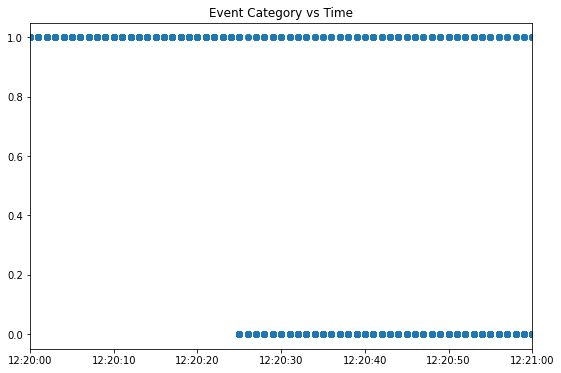

In [17]:
timestamps = [dt.datetime.fromtimestamp(x) for x in z[1]['EventTime'].values]

plt.figure(figsize=(9,6))
plt.scatter(timestamps,z[1]['EventCategory'])

#plt.xlim(dt.datetime(2020,8,26,11,56).timestamp(),dt.datetime(2020,8,26,12,00).timestamp())
#plt.xlim(pd.to_datetime("2020-08-26 11:56"),pd.to_datetime("2020-08-26 12:00"))

plt.xlim(pd.to_datetime("2022-08-26 12:20"),pd.to_datetime("2022-08-26 12:21"))
plt.title("Event Category vs Time")
plt.show()

Here are some "aliases" that define various values we may be referring back to often.
Unlike in ROOT, these "aliases" are calculated here once, not recalculated each time they are called.
While it is unlikely that these would need to be recalculated due to some change in an underlying variable,
if they do, you will have to rerun this cell (or similar code in another cell) as it will not happen automatically.

In [18]:
#I don't see a better way to handle the aliases than to simply add a pandas column.
#Unfortunately this means that we will have to rerun this cell if anything the aliases depends on changes.
for x in z:
    x['PTwid'] = (x['PTWKf40'] - x['PTWKr40'])*1e6
    x['xdel'] = 1e6*(x['PEWKr20'] - 0.5*(x['PCWKr20']+x['PDWKr20']))-1 # x-delay
    x['ydel'] = 1e6*(0.866*(x['PDWKr20'] - x['PCWKr20']))+9 # y-delay
    # Derive angular delay from xdel and ydel
    x['phidel'] = [180/np.pi*math.atan2(x['ydel'].array[j],x['xdel'].array[j]) for j in range(len(x['ydel'].array))] 
    x['afdel'] = 1e6*(x['PFWKr20']-x['PAWKr20'])

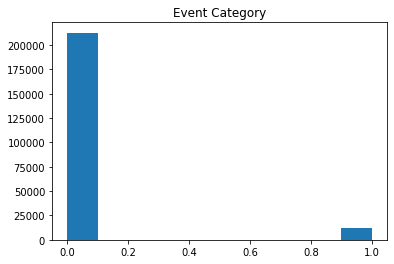

In [19]:
# How many random events are there compared to not?
plt.hist(z[1]['EventCategory'])
plt.title("Event Category")
plt.show()

## Cuts
Now we will experiment with cuts. Cuts are built similarly to the aliases above. 
They are always boolean instead of providing numeric values; their purpose is to limit what data we are displaying and fitting to.
(There are also some "regular" aliases in the cell below as they are needed later.)

In [55]:
nentries = np.zeros(10); timestart = np.zeros(10); timeend = np.zeros(10);
crand = []; ctime0 = []; cam = []; cgoodwalk = []; #'c' for cut; the rest is name of cut
i=0
for x in z:
    nentries[i] = x.shape[0] # Never used anywhere, but it gives you the number of events
    #Find the time of the first and last event in each series
    timestart[i] = np.min(x['EventTime'])
    timeend[i] = np.max(x['EventTime'])
    print(timeend[i]-timestart[i])
    crand.append(x['EventCategory']==1)          #The entry is random. (~crand for nonrandoms)
    ctime0.append(x.index > 60000)               #The entry is after the given time.
    cam.append(x['PFOFamps']/x['PTOFamps']>0.21) #The entry is in the appropriate x-range for Americium
    cgoodwalk.append((x['PCWKr20'] > 0.25e-3)    #The result of ConstFreqRTFTWalk is probably good,
                     & (x['PCWKr20']<0.5e-3)     #based on rise times.
                     & (x['PDWKr20']>0.25e-3))    #This is a quality cut.
    i+=1
timestart[0] = z[0]["EventTime"][60001]
timesec=timeend-timestart

3038.0
4946.0
5131.0
4791.0
5507.0
3638.0


161790 33685


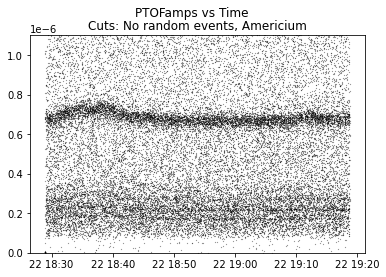

In [27]:
#print(len(~crand[0]),len(cam[0]))
# Get the number of PTFOamps points in the first series, then get that number excluding random and non-americium events
print(len(z[0]['PTOFamps']),len(z[0]['PTOFamps'][~crand[0].array & cam[0]]))
# Set timestamps as the timestamps of events following those conditions
timestamps = [dt.datetime.fromtimestamp(x) for x in z[0]['EventTime'].values[~crand[0] & cam[0]]]
# Plot the PTOFamps points following those conditions over time
plt.scatter(timestamps,z[0]['PTOFamps'][~crand[0] & cam[0]],marker='.',s=0.1,color='k')

plt.ylim(0,1.1e-6)
plt.suptitle("PTOFamps vs Time")
plt.title("Cuts: No random events, Americium")
plt.show()

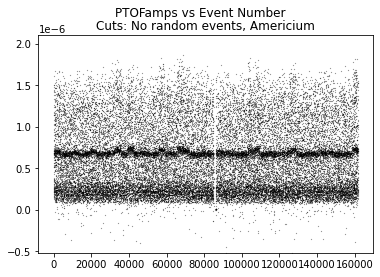

In [28]:
# Similar to above, but with the event number this time
plt.scatter(z[0].index[~crand[0] & cam[0]],z[0]['PTOFamps'][~crand[0] & cam[0]],marker='.',s=0.1,color='k')

plt.ylim(-0.52e-6,2.1e-6)
plt.suptitle("PTOFamps vs Event Number")
plt.title("Cuts: No random events, Americium")
#plt.xlim(0,180e3)
plt.show()

## Fitting

The below plot attempts to fit to one of the peaks present. After the plot are statistics on the fitting process.

200
20


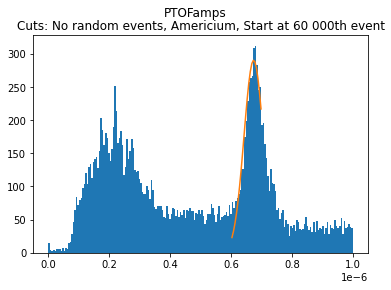

In [29]:
# Get the PTOFamps of events in the first series that aren't random, are americium, and after the 60000th event
withcut = z[0]["PTOFamps"][~crand[0] & cam[0] & ctime0[0]]
bins = np.linspace(0,1e-6,200)
hspec0 = plt.hist(withcut,bins=bins)
def gauss(x,A=1,mu=0,sigma=1):
    return A/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))
subbins = bins[(bins >= 0.6e-6) & (bins <= 0.7e-6)] # Look specifically at a part of the histogram with a peak
# Here we use that taking the index of a plot returns the value put in that spot of the arguments.
print(len(hspec0[1]))
subdata = hspec0[0][(bins[:-1] >= 0.6e-6) & (bins[:-1] <= 0.7e-6)] # Get the data in that zoomed-in spot
print(len(subdata))
# Take the data in that area and fit a gaussian to it
gaussmod = lf.Model(gauss)
gaussparams = gaussmod.make_params(mu=0.675e-6)
gaussparams.add('sigma',value=1e-6,min=0)
gaussparams.add('A',value=1,min=0)
gaussfit = gaussmod.fit(subdata,gaussparams,weights=np.sqrt(subdata),x=subbins)

plt.plot(subbins,gaussfit.best_fit)
plt.suptitle("PTOFamps")
plt.title("Cuts: No random events, Americium, Start at 60 000th event")
plt.show()

gaussfit

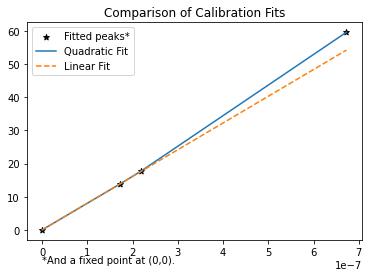

In [30]:
#Points found using gaussian fits to peaks, to be used for calibration.
#x: PTOFamps values
#y: known emission lines (keV)
gcal = [[0,1.73263e-07,2.19449e-07,6.72661e-07],[0,13.95,17.74,59.54]]
plt.scatter(gcal[0],gcal[1],marker="*",color='k',label="Fitted peaks*")

def cal(x,a=1,b=1):
    return a*x+b*x**2

# Similar to the fit above, but with a quadratic fit
calmod = lf.Model(cal)
calparams = calmod.make_params()
calparams.add('a',value=60/7e-7,min=0)
calparams.add('b',value=1e20,min=0) #Start large to give it a push in the right direction
calfit = calmod.fit(gcal[1],calparams,x=gcal[0])

plt.plot(gcal[0],calfit.best_fit,label="Quadratic Fit")
plt.plot(gcal[0],13.95*np.asarray(gcal[0])/1.73263e-07,linestyle='--',label="Linear Fit")

plt.text(0,-10,"*And a fixed point at (0,0).")

plt.title("Comparison of Calibration Fits")
plt.legend()
plt.show()

calfit

## 2D Histograms
Many of the plots below are 2D-histograms that compare two parameters by creating a color-based histogram of frequencies.

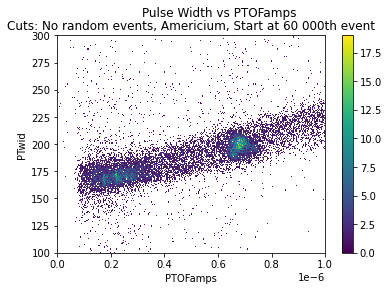

In [31]:
#Total phonon pulse energy, in keV
try: # This bit is here so that if you come back to rerun this cell, the rest of pt_keV won't get overwritten
    pt_keV[0] = calfit.best_values['a']*z[0]["PTOFamps"]+calfit.best_values['b']*z[0]["PTOFamps"]**2
except NameError:
    pt_keV = [calfit.best_values['a']*z[0]["PTOFamps"]+calfit.best_values['b']*z[0]["PTOFamps"]**2]

fig = plt.figure()

#Not a cut; this is a colormap
cmap = cm.viridis.copy()
cmap.set_under('w')

h = plt.hist2d(z[0]["PTOFamps"][~crand[0] & cam[0] & ctime0[0]],
               z[0]["PTwid"][~crand[0] & cam[0] & ctime0[0]],
               bins=[np.linspace(0,1e-6,300),np.linspace(100,300,200)],cmap=cmap,vmin=1e-10)
                #force white bg instead of purple to help comparison.
    
plt.xlabel("PTOFamps")
plt.ylabel("PTwid")
plt.suptitle("Pulse Width vs PTOFamps")
plt.title("Cuts: No random events, Americium, Start at 60 000th event")
fig.colorbar(h[3])
plt.show() #Hard to tell if this is quite right... but it seems okay for now

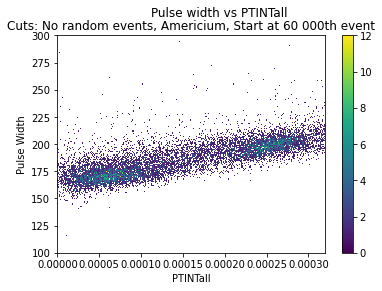

In [32]:
fig = plt.figure()

cmap = cm.viridis.copy()
cmap.set_under('w')

h = plt.hist2d(z[0]["PTINTall"][~crand[0] & cam[0] & ctime0[0]],
               z[0]["PTwid"][~crand[0] & cam[0] & ctime0[0]],
               bins=[np.linspace(0,0.32e-3,300),np.linspace(100,300,200)],cmap=cmap,vmin=1e-10)
                #force white bg instead of purple to help comparison.

fig.colorbar(h[3])
plt.xlabel("PTINTall")
plt.ylabel("Pulse Width")
plt.suptitle("Pulse width vs PTINTall")
plt.title("Cuts: No random events, Americium, Start at 60 000th event")
plt.show()

Here is a new cut to try to get good events.

In [37]:
'''
This is never used, but what it does is it takes ctime0 as the values for the first series, then adds all ones for each
    other series
cgood = [];
cgood.append(ctime0[0])
for i,x in enumerate(z):
    if i>0:
        cgood.append(np.ones(x.shape[0]))
'''
print()

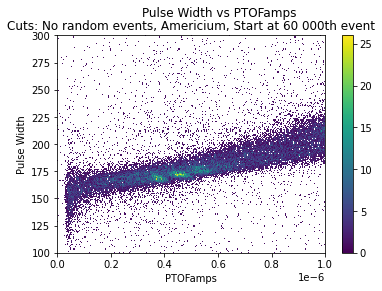

In [38]:
fig = plt.figure()

#colormap
cmap = cm.viridis.copy()
cmap.set_under('w')

# Do the plotting on the second series here
h = plt.hist2d(z[1]["PTOFamps"][~crand[1] & cam[1] & ctime0[1]], 
               z[1]["PTwid"][~crand[1] & cam[1] & ctime0[1]],
               bins=[np.linspace(0,1e-6,300),np.linspace(100,300,200)],cmap=cmap,vmin=1e-10)
                #force white bg instead of purple to help comparison.

fig.colorbar(h[3])
plt.xlabel("PTOFamps")
plt.ylabel("Pulse Width")
plt.suptitle("Pulse Width vs PTOFamps")
plt.title("Cuts: No random events, Americium, Start at 60 000th event")
plt.show()

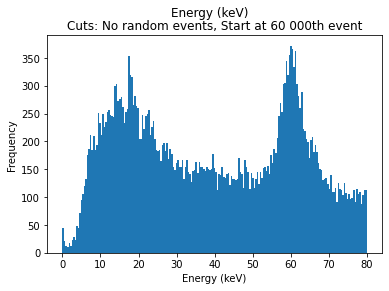

In [39]:
h0 = plt.hist(pt_keV[0][~crand[0] & ctime0[0]],bins=np.linspace(0,80,200))

plt.xlabel("Energy (keV)")
plt.ylabel("Frequency")
plt.suptitle("Energy (keV)")
plt.title("Cuts: No random events, Start at 60 000th event")
plt.show()

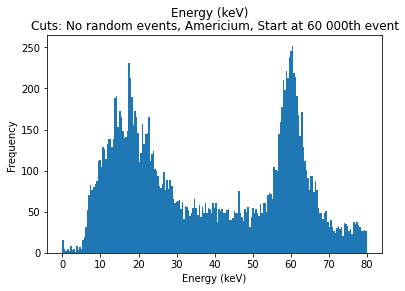

In [40]:
plt.hist(pt_keV[0][~crand[0] & ctime0[0] & cam[0]],bins=np.linspace(0,80,200))
plt.xlabel("Energy (keV)")
plt.ylabel("Frequency")
plt.suptitle("Energy (keV)")
plt.title("Cuts: No random events, Americium, Start at 60 000th event")
plt.show()

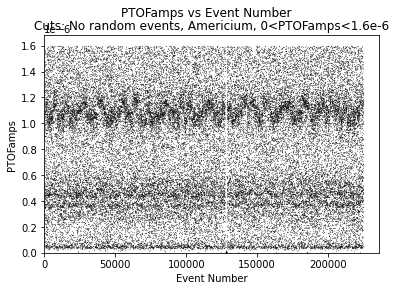

In [41]:
#Adding Americium cut for z[1]
cam[1] = z[1]["PFOFamps"]/z[1]["PTOFamps"] > 0.26 # The aliasing cell earlier has a cutoff at 0.21.
# Including non-random, americium events with 0<PTOFamps<1.6*10^-6,
plt.scatter(z[1].index[~crand[1] & cam[1] & (z[1]["PTOFamps"] > 0) & (z[1]["PTOFamps"] < 1.6e-6)], # plot the event number,
            z[1]["PTOFamps"][~crand[1] & cam[1] & (z[1]["PTOFamps"] > 0) & (z[1]["PTOFamps"] < 1.6e-6)], # against PTOFamps,
            s=0.02,color='k') # with small marker size in black and white.

plt.xlabel("Event Number")
plt.ylabel("PTOFamps")
plt.suptitle("PTOFamps vs Event Number")
plt.title("Cuts: No random events, Americium, 0<PTOFamps<1.6e-6") #note: for plotting alone, this last cut could easily be done by simply adjusting the plot limits
plt.ylim(0); plt.xlim(0)
plt.show()

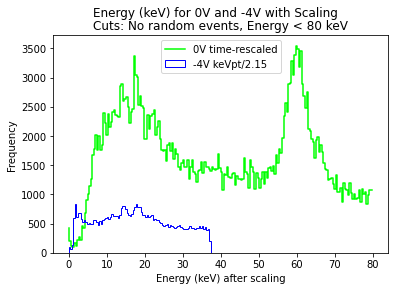

In [56]:
try: # The arbitrary-looking numbers here are the a and b values from the quadratic fit.
    pt_keV[1] = 7.73882e+07*z[1]["PTOFamps"]+1.653756e+13*z[1]["PTOFamps"]**2
except IndexError:
    pt_keV.append(7.73882e+07*z[1]["PTOFamps"]+1.653756e+13*z[1]["PTOFamps"]**2)

# (h0[1][:-1]+h0[1][1:])/2 is essentially the bins from h0 with one removed.
plt.step((h0[1][:-1]+h0[1][1:])/2,h0[0]*timesec[1]/timesec[0],color='lime',label="0V time-rescaled")
# We use a new cut here: is the phonon energy below 80 keV?
h1 = plt.hist(np.asarray(pt_keV[1])[((pt_keV[1])<80) & ~crand[1]]/2.15,
         bins=np.linspace(0,80,200),histtype='step',color='blue',label="-4V keVpt/2.15")#,linewidth=2)
plt.legend()
plt.xlabel("Energy (keV) after scaling")
plt.ylabel("Frequency")
plt.suptitle("Energy (keV) for 0V and -4V with Scaling")
plt.title("Cuts: No random events, Energy < 80 keV")
plt.show()

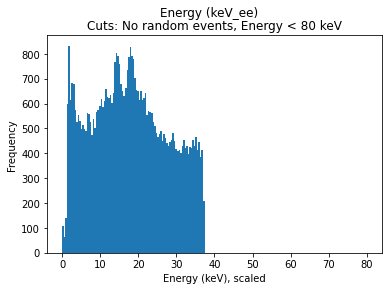

In [43]:
plt.hist(pt_keV[1][~crand[1] & (pt_keV[1]<80)]/2.15,bins=np.linspace(0,80,200))
plt.xlabel("Energy (keV), scaled")
plt.ylabel("Frequency")
plt.suptitle("Energy (keV_ee)")
plt.title("Cuts: No random events, Energy < 80 keV")
plt.show()

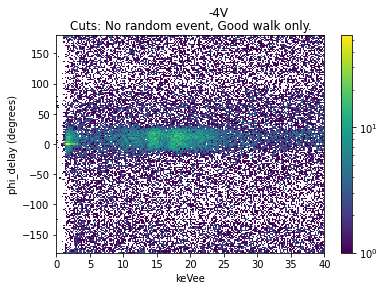

In [45]:
fig = plt.figure()
h = plt.hist2d(pt_keV[1][~crand[1] & cgoodwalk[1]]/2.15,
               z[1]["phidel"][~crand[1] & cgoodwalk[1]],
               bins=[np.linspace(0,40,200),np.linspace(-180,180,180)],
               cmap=cmap,norm=colors.LogNorm())
               #force white bg instead of purple to help comparison.
    
plt.suptitle("-4V")
plt.xlabel("keVee")
plt.ylabel("phi_delay (degrees)")
plt.title("Cuts: No random event, Good walk only.")
fig.colorbar(h[3])
plt.show()

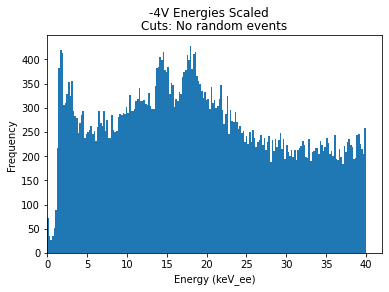

In [46]:
plt.hist(pt_keV[1][~crand[1]]/2.15,bins=np.linspace(0,40,200))
plt.xlim(0)
plt.xlabel("Energy (keV_ee)")
plt.ylabel("Frequency")
plt.title("Cuts: No random events")
plt.suptitle("-4V Energies Scaled")
plt.show()

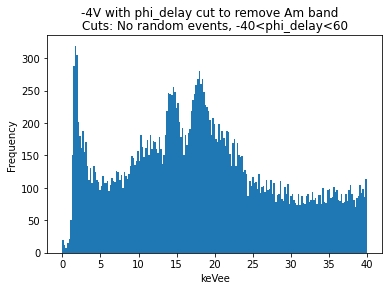

In [48]:
# Cut on the phi-delay being between -40 and 60
plt.hist(pt_keV[1][~crand[1] & ((z[1]["phidel"]>-40) & (z[1]["phidel"]<60))]/2.15,bins=np.linspace(0,40,200))
plt.suptitle("-4V with phi_delay cut to remove Am band")
plt.xlabel("keVee")
plt.ylabel("Frequency")
plt.title("Cuts: No random events, -40<phi_delay<60")
plt.show()

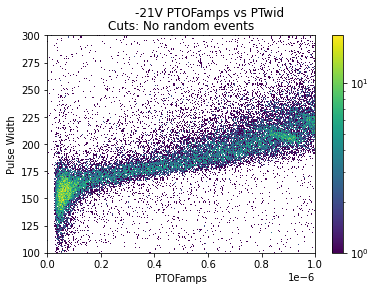

In [49]:
fig = plt.figure()
# Plot on the third series here
h = plt.hist2d(z[2]["PTOFamps"][~crand[2]],z[2]["PTwid"][~crand[2]],
           bins=(np.linspace(0,1e-6,300),np.linspace(100,300,200)),cmap=cmap,norm=colors.LogNorm())
plt.xlabel("PTOFamps")
plt.ylabel("Pulse Width")
plt.title("Cuts: No random events")
plt.suptitle(lab[2]+" PTOFamps vs PTwid")
fig.colorbar(h[3])
plt.show()

The try/except cases below are designed to make the code a bit more robust when run out of order.

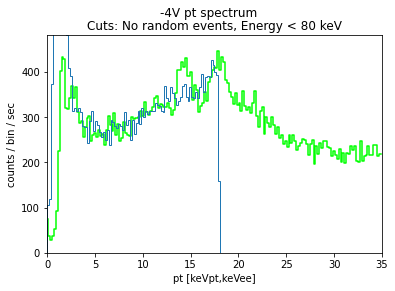

In [57]:
try: # The definition of pt_keV could probably go into one cell.
    pt_keV[2] = 7.738820e+07*z[2]["PTOFamps"]+1.653756e+13*z[2]["PTOFamps"]**2
except IndexError:
    pt_keV.append(7.738820e+07*z[2]["PTOFamps"]+1.653756e+13*z[2]["PTOFamps"]**2)
try:
    pt0_keV[2] = 7.738820e+07*z[2]["PTOFamps0"]+1.653756e+13*z[2]["PTOFamps0"]**2
except NameError:
    pt0_keV = [[],[],7.738820e+07*z[2]["PTOFamps0"]+1.653756e+13*z[2]["PTOFamps0"]**2]

h1 = np.histogram(pt_keV[1][~crand[1]]/2.15,bins=np.linspace(0,35,175));
fig = plt.figure()
    
plt.step((h1[1][:-1]+h1[1][1:])/2,h1[0]*timesec[2]/timesec[1],color='lime',label="-4V keVpt/2.15 time-rescaled")
h2 = plt.hist(pt_keV[2][~crand[2] & (pt_keV[2]<80)]/4.45,bins=np.linspace(0,35,175),histtype='step')

plt.suptitle("-4V pt spectrum")
plt.title("Cuts: No random events, Energy < 80 keV")
plt.xlabel("pt [keVpt,keVee]");plt.ylabel("counts / bin / sec")
plt.xlim(0,35);plt.ylim(0,480)
plt.show()

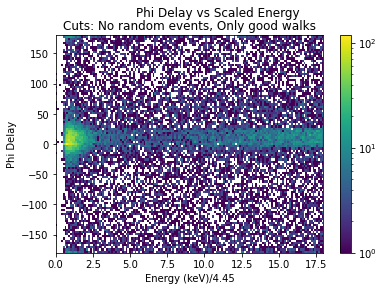

In [58]:
fig = plt.figure()
h = plt.hist2d(pt_keV[2][~crand[2] & cgoodwalk[2]]/4.45,z[2]["phidel"][~crand[2] & cgoodwalk[2]],
           bins=(np.linspace(0,18,150),np.linspace(-180,180,100)),norm=colors.LogNorm())
fig.colorbar(h[3])
plt.xlabel("Energy (keV)/4.45")
plt.ylabel("Phi Delay")
plt.suptitle("Phi Delay vs Scaled Energy")
plt.title("Cuts: No random events, Only good walks")
plt.show()

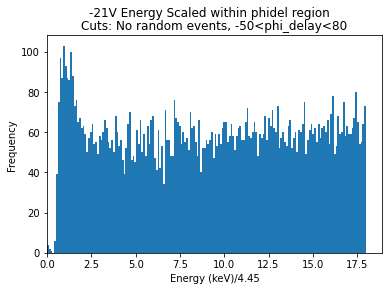

In [59]:
plt.hist(pt_keV[2][~crand[2] & ~((z[2]["phidel"]>-50)&(z[2]["phidel"]<80)) & cgoodwalk[2]]/4.45,
         bins=np.linspace(0,18,180))
plt.xlim(0)
plt.xlabel("Energy (keV)/4.45")
plt.ylabel("Frequency")
plt.suptitle(lab[2]+" Energy Scaled within phidel region")
plt.title("Cuts: No random events, -50<phi_delay<80")
plt.show()

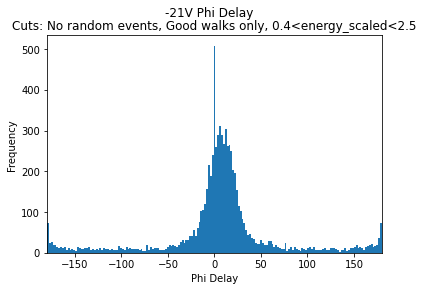

In [60]:
# Check if the scaled phonon energy is between 0.4 and 2.5
plt.hist(z[2]["phidel"][~crand[2] & cgoodwalk[2] & (pt_keV[2]/4.45 > 0.4) & (pt_keV[2]/4.15 < 2.5)],
         bins=np.linspace(-180,180,180))
plt.title("Cuts: No random events, Good walks only, 0.4<energy_scaled<2.5")
plt.suptitle(lab[2]+" Phi Delay")
plt.xlabel("Phi Delay")
plt.ylabel("Frequency")
plt.xlim(-180,180)
plt.show()

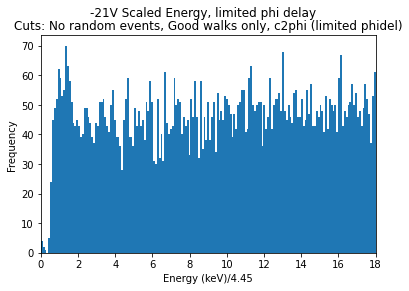

In [61]:
#A cut limiting phidel
for x in z: # An event has c2phi true if its phidel is between -160 and -50 or between 70 and 150.
    x["c2phi"] = ((x["phidel"] > -160) & (x["phidel"] < -50)) | ((x["phidel"] > 70) & (x["phidel"] < 150))
    
plt.hist(pt_keV[2][~crand[2] & cgoodwalk[2] & z[2]["c2phi"]]/4.45,bins=np.linspace(0,18,180))
plt.xlim(0,18)
plt.xlabel("Energy (keV)/4.45")
plt.ylabel("Frequency")
plt.title("Cuts: No random events, Good walks only, c2phi (limited phidel)")
plt.suptitle(lab[2]+" Scaled Energy, limited phi delay")
plt.show()

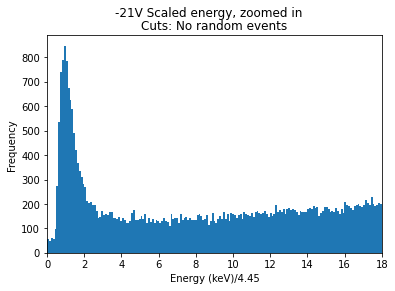

In [62]:
h2 = plt.hist(pt_keV[2][~crand[2]]/4.45,bins=np.linspace(0,18,180))
plt.xlim(0,18)
plt.xlabel("Energy (keV)/4.45")
plt.ylabel("Frequency")
plt.title("Cuts: No random events")
plt.suptitle(lab[2]+" Scaled energy, zoomed in")
plt.show()

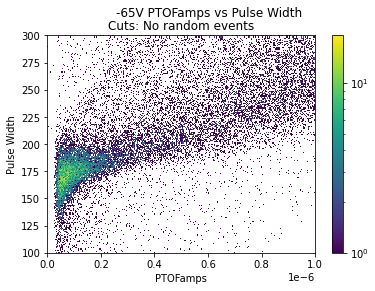

In [63]:
fig = plt.figure()
# Fourth series here
h = plt.hist2d(z[3]["PTOFamps"][~crand[3]],z[3]["PTwid"][~crand[3]],
           bins=(np.linspace(0,1e-6,300),np.linspace(100,300,200)),norm=colors.LogNorm())
fig.colorbar(h[3])
plt.title("Cuts: No random events")
plt.xlabel("PTOFamps")
plt.ylabel("Pulse Width")
plt.suptitle(lab[3]+" PTOFamps vs Pulse Width")
plt.show()

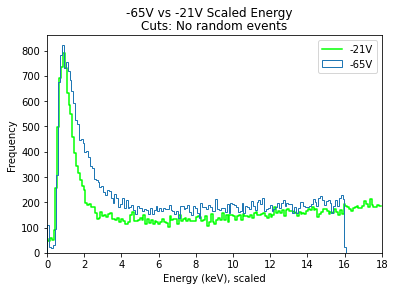

In [64]:
try:
    pt_keV[3] = 7.738820e+07*z[3]["PTOFamps"]+1.653756e+13*z[3]["PTOFamps"]**2
except IndexError:
    pt_keV.append(7.738820e+07*z[3]["PTOFamps"]+1.653756e+13*z[3]["PTOFamps"]**2)
try:
    pt0_keV[3] = 7.738820e+07*z[3]["PTOFamps0"]+1.653756e+13*z[3]["PTOFamps0"]**2
except IndexError:
    pt0_keV.append(7.738820e+07*z[3]["PTOFamps0"]+1.653756e+13*z[3]["PTOFamps0"]**2)

plt.step((h2[1][:-1]+h2[1][1:])/2,h2[0]*timesec[3]/timesec[2],color='lime',label=lab[2])
h3 = plt.hist(pt_keV[3][~crand[3] & (pt_keV[3]<80)]/5,bins=np.linspace(0,18,180),histtype='step',label=lab[3])
plt.xlim(0,18); plt.ylim(0,860)
plt.xlabel("Energy (keV), scaled")
plt.ylabel("Frequency")
plt.title("Cuts: No random events")
plt.suptitle(lab[3]+" vs "+lab[2]+" Scaled Energy")
plt.legend()
plt.show()

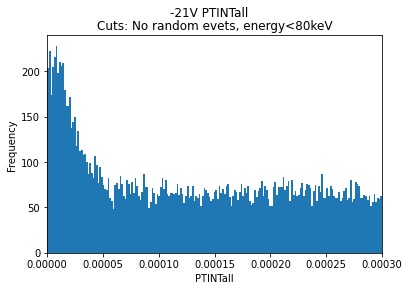

In [65]:
h2i = plt.hist(z[2]["PTINTall"][~crand[2] & (pt_keV[2]<80)],bins=np.linspace(0,0.0003,200))
plt.xlim(0,0.0003)
plt.title("Cuts: No random evets, energy<80keV")
plt.xlabel("PTINTall"); plt.ylabel("Frequency")
plt.suptitle(lab[2]+" PTINTall")
plt.show()

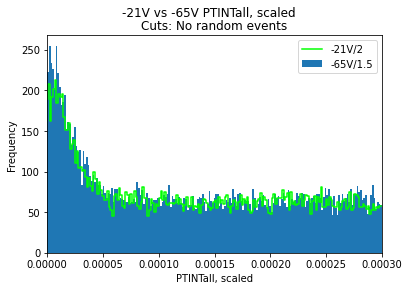

In [66]:
plt.step((h2i[1][:-1]+h2i[1][1:])/2,h2i[0]*timesec[3]/timesec[2],color='lime',label=lab[2]+"/2")
plt.hist(z[3]["PTINTall"][~crand[3]]/1.5,bins=np.linspace(0,0.0003,200),label=lab[3]+"/1.5")
plt.suptitle(lab[2]+" vs "+lab[3]+" PTINTall, scaled")
plt.title("Cuts: No random events")
plt.xlabel("PTINTall, scaled")
plt.ylabel("Frequency")
plt.legend()

plt.xlim(0,0.0003)
plt.show()

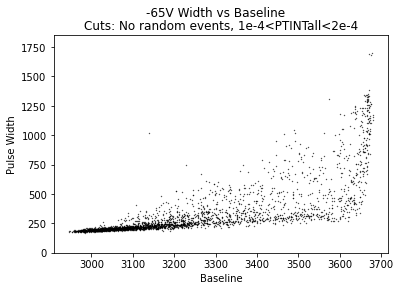

In [67]:
plt.scatter(z[3]["PFbs"][~crand[3] & (z[3]["PTINTall"]>0.1e-3) & (z[3]["PTINTall"]<0.2e-3)],
            z[3]["PTwid"][~crand[3] & (z[3]["PTINTall"]>0.1e-3) & (z[3]["PTINTall"]<0.2e-3)],
           s=0.1,color='k')
plt.ylim(0,1850)
plt.xlabel("Baseline"); plt.ylabel("Pulse Width")
plt.title("Cuts: No random events, 1e-4<PTINTall<2e-4")
plt.suptitle(lab[3]+" Width vs Baseline")
plt.show()

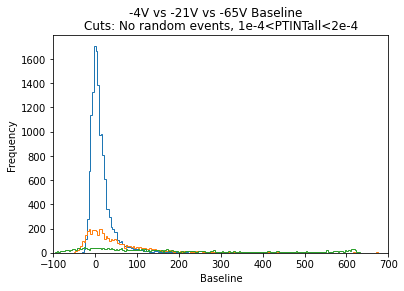

In [68]:
h1bs = plt.hist(z[1]["PFbs"][~crand[1] & (z[1]["PTINTall"]>0.1e-3) & (z[1]["PTINTall"]<0.2e-3)] - 3026,
         bins = np.linspace(-100,700,200),histtype="step")
h2bs = plt.hist(z[2]["PFbs"][~crand[2] & (z[2]["PTINTall"]>0.1e-3) & (z[2]["PTINTall"]<0.2e-3)] - 2935,
         bins = np.linspace(-100,700,200),histtype="step")
h3bs = plt.hist(z[3]["PFbs"][~crand[3] & (z[3]["PTINTall"]>0.1e-3) & (z[3]["PTINTall"]<0.2e-3)] - 3050,
         bins = np.linspace(-100,700,200),histtype="step")
plt.suptitle(lab[1]+" vs "+lab[2]+" vs "+lab[3]+" Baseline")
plt.title("Cuts: No random events, 1e-4<PTINTall<2e-4")
plt.xlabel("Baseline"); plt.ylabel("Frequency")
plt.xlim(-100,700)
plt.show()

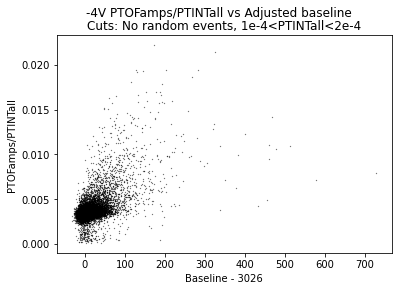

In [69]:
plt.scatter(z[1]["PFbs"][~crand[1] & (z[1]["PTINTall"]>0.1e-3) & (z[1]["PTINTall"]<0.2e-3)] - 3026, 
            z[1]["PTOFamps"][~crand[1] & (z[1]["PTINTall"]>0.1e-3) & (z[1]["PTINTall"]<0.2e-3)]/z[1]["PTINTall"][~crand[1] & (z[1]["PTINTall"]>0.1e-3) & (z[1]["PTINTall"]<0.2e-3)],
           s=0.05,color='k')
plt.title("Cuts: No random events, 1e-4<PTINTall<2e-4")
plt.xlabel("Baseline - 3026"); plt.ylabel("PTOFamps/PTINTall")
plt.suptitle(lab[1]+" PTOFamps/PTINTall vs Adjusted baseline")
plt.show()

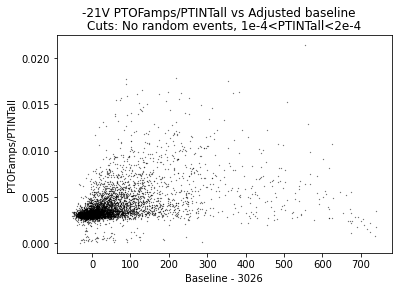

In [70]:
plt.scatter(z[2]["PFbs"][~crand[2] & (z[2]["PTINTall"]>0.1e-3) & (z[2]["PTINTall"]<0.2e-3)] - 2935, 
            z[2]["PTOFamps"][~crand[2] & (z[2]["PTINTall"]>0.1e-3) & (z[2]["PTINTall"]<0.2e-3)]/z[2]["PTINTall"][~crand[2] & (z[2]["PTINTall"]>0.1e-3) & (z[2]["PTINTall"]<0.2e-3)],
           s=0.05,color='k')
plt.title("Cuts: No random events, 1e-4<PTINTall<2e-4")
plt.xlabel("Baseline - 3026"); plt.ylabel("PTOFamps/PTINTall")
plt.suptitle(lab[2]+" PTOFamps/PTINTall vs Adjusted baseline")
plt.show()

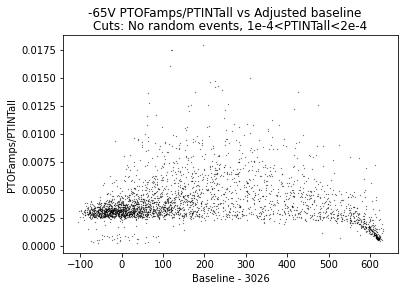

In [71]:
plt.scatter(z[3]["PFbs"][~crand[3] & (z[3]["PTINTall"]>0.1e-3) & (z[3]["PTINTall"]<0.2e-3)] - 3050, 
            z[3]["PTOFamps"][~crand[3] & (z[3]["PTINTall"]>0.1e-3) & (z[3]["PTINTall"]<0.2e-3)]/z[3]["PTINTall"][~crand[3] & (z[3]["PTINTall"]>0.1e-3) & (z[3]["PTINTall"]<0.2e-3)],
           s=0.05,color='k')
plt.title("Cuts: No random events, 1e-4<PTINTall<2e-4")
plt.xlabel("Baseline - 3026"); plt.ylabel("PTOFamps/PTINTall")
plt.suptitle(lab[3]+" PTOFamps/PTINTall vs Adjusted baseline")
plt.show()

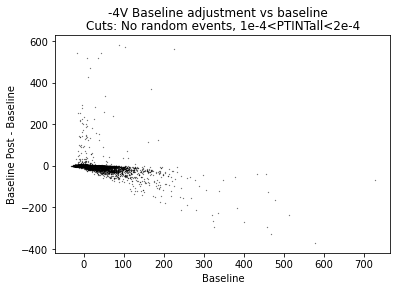

In [72]:
c3bs = z[3]["PFbs"] - 3050 < 540 #A cut limiting the pre-trigger baseline
plt.scatter(z[1]["PFbs"][~crand[1] & (z[1]["PTINTall"]>0.1e-3) & (z[1]["PTINTall"]<0.2e-3)]-3026,
            z[1]["PFbspost"][~crand[1] & (z[1]["PTINTall"]>0.1e-3) & (z[1]["PTINTall"]<0.2e-3)] 
            - z[1]["PFbs"][~crand[1] & (z[1]["PTINTall"]>0.1e-3) & (z[1]["PTINTall"]<0.2e-3)],
           s=0.05,color='k')
plt.xlabel("Baseline"); plt.ylabel("Baseline Post - Baseline")
plt.title("Cuts: No random events, 1e-4<PTINTall<2e-4")
plt.suptitle(lab[1]+" Baseline adjustment vs baseline")
plt.show()

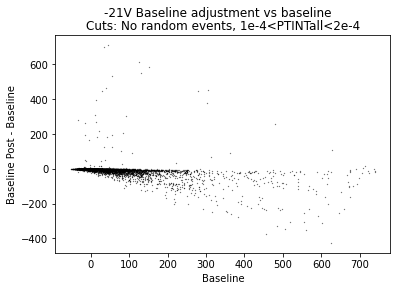

In [73]:
plt.scatter(z[2]["PFbs"][~crand[2] & (z[2]["PTINTall"]>0.1e-3) & (z[2]["PTINTall"]<0.2e-3)]-2935,
            z[2]["PFbspost"][~crand[2] & (z[2]["PTINTall"]>0.1e-3) & (z[2]["PTINTall"]<0.2e-3)] 
            - z[2]["PFbs"][~crand[2] & (z[2]["PTINTall"]>0.1e-3) & (z[2]["PTINTall"]<0.2e-3)],
           s=0.05,color='k')
plt.xlabel("Baseline"); plt.ylabel("Baseline Post - Baseline")
plt.title("Cuts: No random events, 1e-4<PTINTall<2e-4")
plt.suptitle(lab[2]+" Baseline adjustment vs baseline")
plt.show()

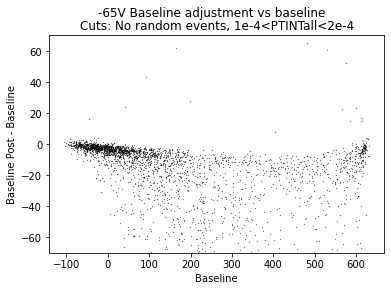

In [74]:
plt.scatter(z[3]["PFbs"][~crand[3] & (z[3]["PTINTall"]>0.1e-3) & (z[3]["PTINTall"]<0.2e-3)]-3050,
            z[3]["PFbspost"][~crand[3] & (z[3]["PTINTall"]>0.1e-3) & (z[3]["PTINTall"]<0.2e-3)] 
            - z[3]["PFbs"][~crand[3] & (z[3]["PTINTall"]>0.1e-3) & (z[3]["PTINTall"]<0.2e-3)],
           s=0.05,color='k')
plt.xlabel("Baseline"); plt.ylabel("Baseline Post - Baseline")
plt.title("Cuts: No random events, 1e-4<PTINTall<2e-4")
plt.suptitle(lab[3]+" Baseline adjustment vs baseline")
plt.ylim(-70,70)
plt.show()

/data/chocula/test_cdmsbats/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


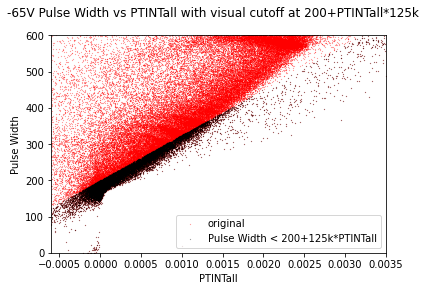

In [75]:
c2wid = z[2]["PTwid"]<180 + 125000*z[2]["PTINTall"] #A cut limiting the pulse width
c3wid = z[3]["PTwid"]<200 + 125000*z[3]["PTINTall"] #Same cut for z[3]
# The legend is a bit odd, so it is worth noting that the original data is red and the data with the cut is in black.
plt.scatter(z[3]["PTINTall"][~crand[3] & cgoodwalk[3]],z[3]["PTwid"][~crand[3] & cgoodwalk[3]],
           s=0.02,color='r',label='original')
plt.scatter(z[3]["PTINTall"][~crand[3] & cgoodwalk[3] & c3wid],
            z[3]["PTwid"][~crand[3] & cgoodwalk[3] & c3wid],s=0.02,color='k',label='Pulse Width < 200+125k*PTINTall')
plt.legend()
plt.suptitle(lab[3]+" Pulse Width vs PTINTall with visual cutoff at 200+PTINTall*125k")
plt.xlabel("PTINTall"); plt.ylabel("Pulse Width")
plt.ylim(0,600);plt.xlim(-0.0006,0.0035)
plt.show()

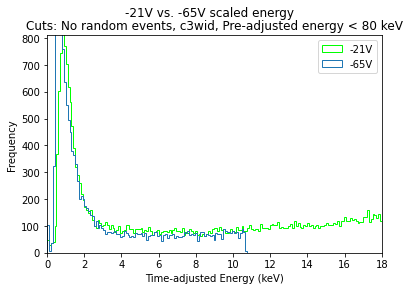

In [76]:
fig = plt.figure()

h2w = plt.hist(pt_keV[2][~crand[2] & c2wid]/4.45*timesec[3]/timesec[2],bins=np.linspace(0,18,180),
              color='lime',histtype='step',label=lab[2])
h3w = plt.hist(pt_keV[3][~crand[3] & c3wid & (pt_keV[3]<80)]/7.5,bins=np.linspace(0,18,180),histtype='step',label=lab[3])

plt.xlabel("Time-adjusted Energy (keV)"); plt.ylabel("Frequency")
plt.title("Cuts: No random events, c3wid, Pre-adjusted energy < 80 keV")
plt.suptitle(lab[2]+" vs. "+lab[3]+" scaled energy")

plt.legend()
plt.xlim(0,18);plt.ylim(0,810)
plt.show()

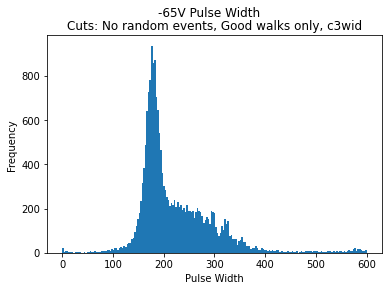

In [77]:
plt.hist(z[3]["PTwid"][~crand[3] & cgoodwalk[3] & c3wid],bins=np.linspace(0,600,200))
plt.title("Cuts: No random events, Good walks only, c3wid")
plt.suptitle(lab[3]+" Pulse Width")
plt.xlabel("Pulse Width"); plt.ylabel("Frequency")
plt.show()

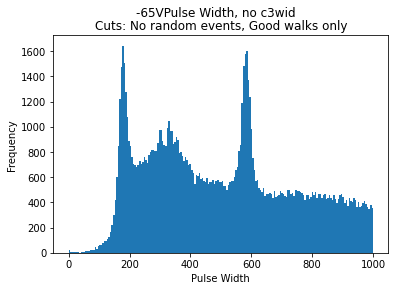

In [78]:
plt.hist(z[3]["PTwid"][~crand[3] & cgoodwalk[3]],bins=np.linspace(0,1000,200))
plt.suptitle(lab[3]+"Pulse Width, no c3wid")
plt.title("Cuts: No random events, Good walks only")
plt.xlabel("Pulse Width"); plt.ylabel("Frequency")
plt.show()

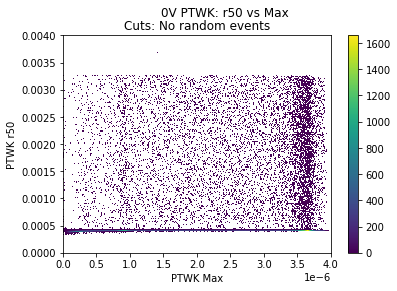

In [79]:
fig = plt.figure()
h = plt.hist2d(z[0]["PTWKmax"][~crand[0]],z[0]["PTWKr50"][~crand[0]],
           bins=(np.linspace(0,4e-6,300),np.linspace(0,0.004,200)),cmap=cmap,vmin=1e-10)
fig.colorbar(h[3])
plt.xlabel("PTWK Max"); plt.ylabel("PTWK r50")
plt.title("Cuts: No random events")
plt.suptitle(lab[0]+" PTWK: r50 vs Max")
plt.show()

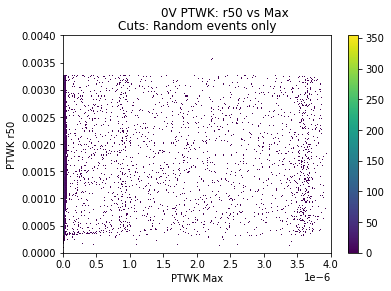

In [80]:
fig = plt.figure()
h = plt.hist2d(z[0]["PTWKmax"][crand[0]],z[0]["PTWKr50"][crand[0]],
           bins=(np.linspace(0,4e-6,300),np.linspace(0,0.004,200)),cmap=cmap,vmin=1e-10)
fig.colorbar(h[3])
plt.xlabel("PTWK Max"); plt.ylabel("PTWK r50")
plt.title("Cuts: Random events only")
plt.suptitle(lab[0]+" PTWK: r50 vs Max")
plt.show()

In [81]:
print("Random events in",lab[0],"data:", len(crand[0][crand[0]]))
print("Random events in",lab[0],"with PTWK max above 5e-7 and PTWK r50 between 5e-4 and 3e-3:", len(crand[0][crand[0] & (z[0]["PTWKmax"] > 0.5e-6) & (z[0]["PTWKr50"]>0.0005) & (z[0]["PTWKr50"] < 0.003)]))
twindow = 0.003-0.0005
rate_rand = math.log(15345/(15345-1727))/twindow
print("Rate of random events in",lab[0],"(Hz):",rate_rand)
print("Non-random events in",lab[0],"beyond 60kth with PTWK max above 5e-7: ",len(crand[0][~crand[0] & ctime0[0] & (z[0]["PTWKmax"]>0.5e-6)]))
rate_trig = 78339/timesec[0]
print("Trigger rate in",lab[0],"(Hz):",rate_trig)
effic_write = rate_trig/rate_rand
print("Write efficiency for",lab[0]+":",effic_write)

Random events in 0V data: 15345
Random events in 0V with PTWK max above 5e-7 and PTWK r50 between 5e-4 and 3e-3: 1727
Rate of random events in 0V (Hz): 47.75889640436981
Non-random events in 0V beyond 60kth with PTWK max above 5e-7:  77559
Trigger rate in 0V (Hz): 150.94219653179192
Write efficiency for 0V: 3.1605042807894765


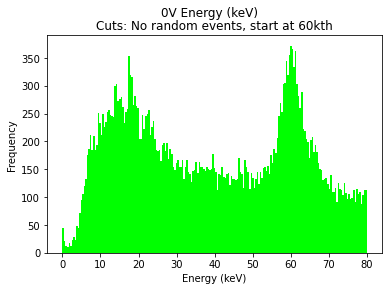

In [82]:
plt.hist(pt_keV[0][~crand[0] & ctime0[0]],bins=np.linspace(0,80,200),color='lime')
plt.xlabel("Energy (keV)"); plt.ylabel("Frequency")
plt.title("Cuts: No random events, start at 60kth")
plt.suptitle(lab[0]+" Energy (keV)")
plt.show()

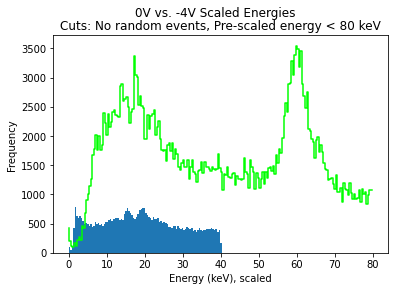

In [85]:
pt_keV[1] = 7.738820e+07*z[1]["PTOFamps"] + 1.653756e+13*z[1]["PTOFamps"]**2

plt.step((h0[1][:-1]+h0[1][1:])/2,h0[0]*timesec[1]/timesec[0],color='lime')
h1 = plt.hist(pt_keV[1][~crand[1] & (pt_keV[1]<80)]/2.,bins=np.linspace(0,80,200))

plt.suptitle(lab[0]+" vs. "+lab[1]+" Scaled Energies")
plt.title("Cuts: No random events, Pre-scaled energy < 80 keV")
plt.xlabel("Energy (keV), scaled"); plt.ylabel("Frequency")
plt.show()

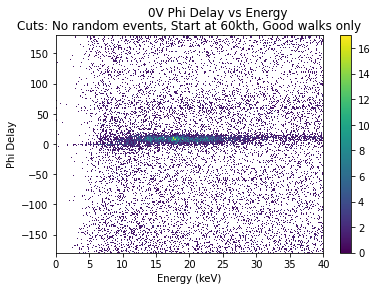

In [86]:
fig = plt.figure()
h = plt.hist2d(pt_keV[0][~crand[0] & ctime0[0] & cgoodwalk[0]],z[0]["phidel"][~crand[0] & ctime0[0] & cgoodwalk[0]],
           bins=(np.linspace(0,40,300),np.linspace(-180,180,200)),cmap=cmap,vmin=1e-10)
fig.colorbar(h[3])
plt.xlabel("Energy (keV)"); plt.ylabel("Phi Delay")
plt.title("Cuts: No random events, Start at 60kth, Good walks only")
plt.suptitle(lab[0]+" Phi Delay vs Energy")
plt.show()

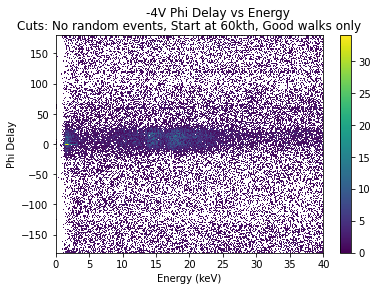

In [87]:
fig = plt.figure()
h = plt.hist2d(pt_keV[1][~crand[1] & cgoodwalk[1]]/2.15,z[1]["phidel"][~crand[1] & cgoodwalk[1]],
           bins=(np.linspace(0,40,300),np.linspace(-180,180,200)),cmap=cmap,vmin=1e-10)
fig.colorbar(h[3])
plt.xlabel("Energy (keV)"); plt.ylabel("Phi Delay")
plt.title("Cuts: No random events, Start at 60kth, Good walks only")
plt.suptitle(lab[1]+" Phi Delay vs Energy")
plt.show()

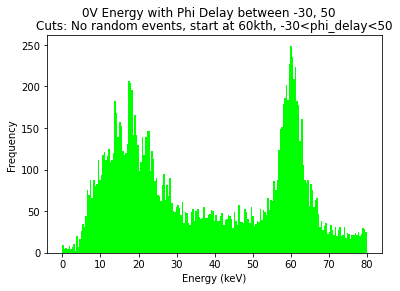

In [88]:
camphi = []
for x in z:
    camphi.append((x["phidel"]>-30) & (x["phidel"]<50))

h0am = plt.hist(pt_keV[0][~crand[0] & ctime0[0] & camphi[0]],bins=np.linspace(0,80,200),color='lime')

plt.xlabel("Energy (keV)"); plt.ylabel("Frequency")
plt.title("Cuts: No random events, start at 60kth, -30<phi_delay<50")
plt.suptitle(lab[0]+" Energy with Phi Delay between -30, 50")

plt.show()

At this point, I've stopped frequently encountering issues -- so I think I have the hang of things. No need to continue replicating <i>everything</i>; we should move on to trying out cdmsbats.